# EDA

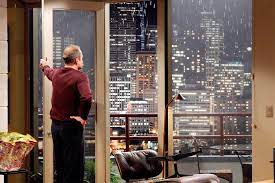

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv("data/eda.csv")

df.head()



,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


In [4]:
df.yr_renovated.isna().sum()

np.int64(3848)

In [5]:
df.columns


Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id.1'],
      dtype='object')

In [6]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

waterfront       2391
view               63
sqft_basement     452
yr_renovated     3848
dtype: int64

In [7]:
df['yr_renovated'].fillna(0, inplace = True)
df['waterfront'].fillna(0, inplace = True)
df['sqft_basement'].fillna(0, inplace = True)
df['view'].fillna(df['view'].mode()[0], inplace = True )

df.isnull().sum().sum()

np.int64(0)

In [8]:

df['bedrooms'].describe()


count   21597.000
mean        3.373
std         0.926
min         1.000
25%         3.000
50%         3.000
75%         4.000
max        33.000
Name: bedrooms, dtype: float64

In [9]:
df = df[df['bedrooms'] < 10] 


In [10]:
df['bedrooms'].describe()


count   21592.000
mean        3.371
std         0.899
min         1.000
25%         3.000
50%         3.000
75%         4.000
max         9.000
Name: bedrooms, dtype: float64

In [11]:
df['yr_renovated'].describe()

count   21592.000
mean      686.815
std      3638.414
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     20150.000
Name: yr_renovated, dtype: float64

In [12]:
(df.yr_renovated/10).astype('int')

0           0
1        1991
2           0
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21592, dtype: int64

In [13]:
df['yr_renovated'] = (df.yr_renovated/10).astype('int')
df.yr_renovated

0           0
1        1991
2           0
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21592, dtype: int64

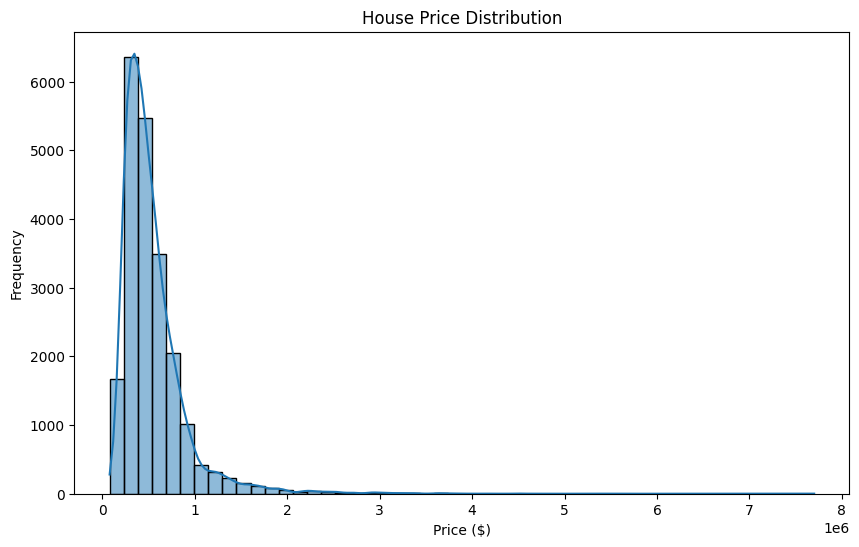

In [14]:
plt.figure(figsize = (10,6))
sns.histplot(df['price'], bins = 50, kde =True)
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.title("House Price Distribution")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

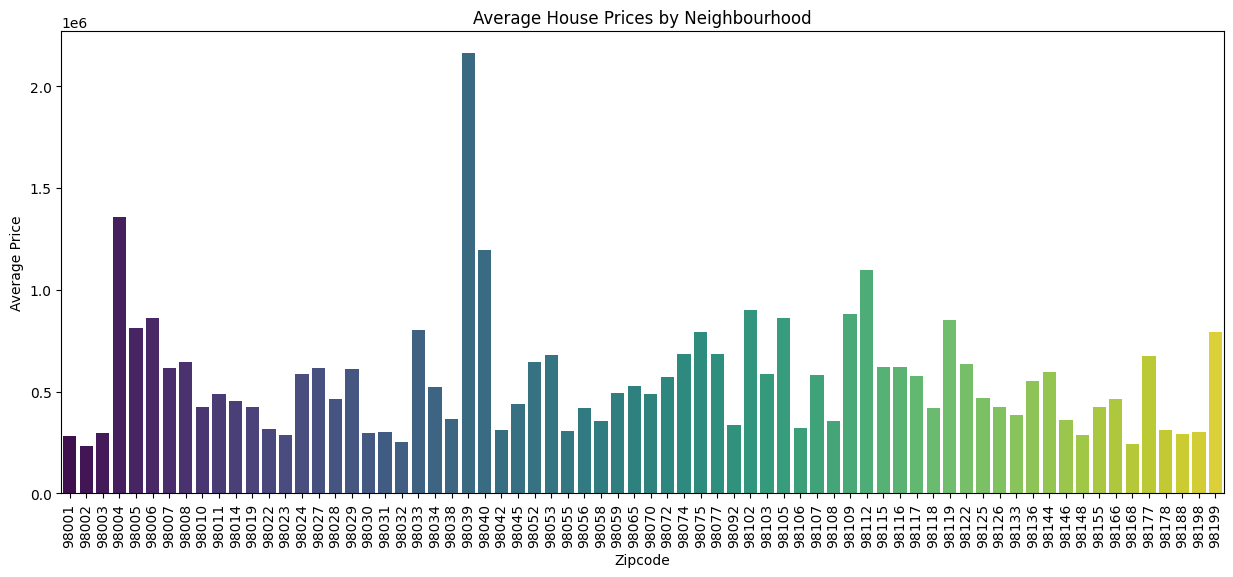

In [ ]:
df_grouped = df.groupby("zipcode")["price"].mean().sort_values(ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x=df_grouped.index, y=df_grouped.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Zipcode")
plt.ylabel("Average Price")
plt.title("Average House Prices by Neighbourhood")
plt.show


#find the most profitable areas

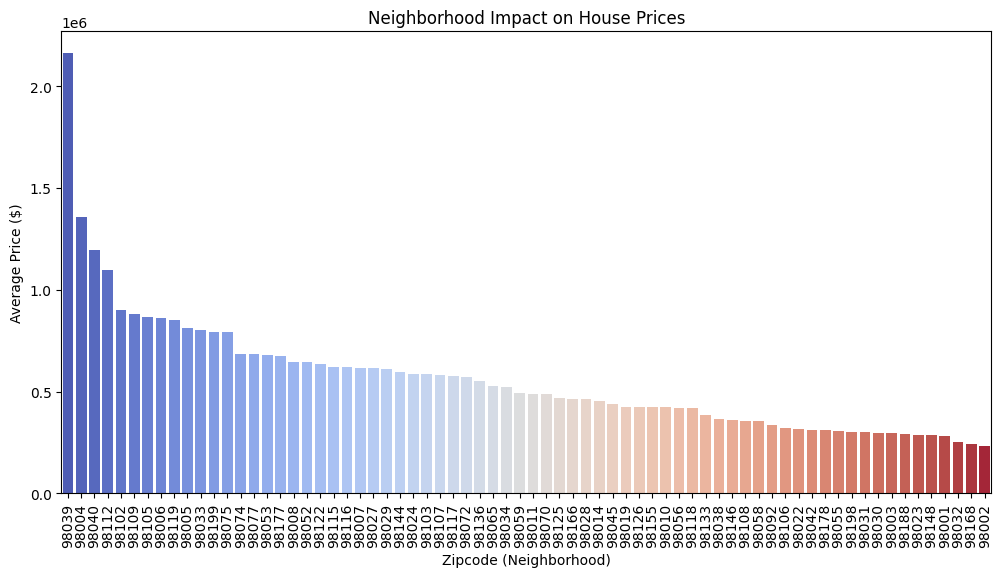

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_zip.index, y=avg_price_by_zip.values, palette="coolwarm", order=avg_price_by_zip.index)
plt.xlabel("Zipcode (Neighborhood)")
plt.ylabel("Average Price ($)")
plt.title("Neighborhood Impact on House Prices")
plt.xticks(rotation=90)
plt.show()


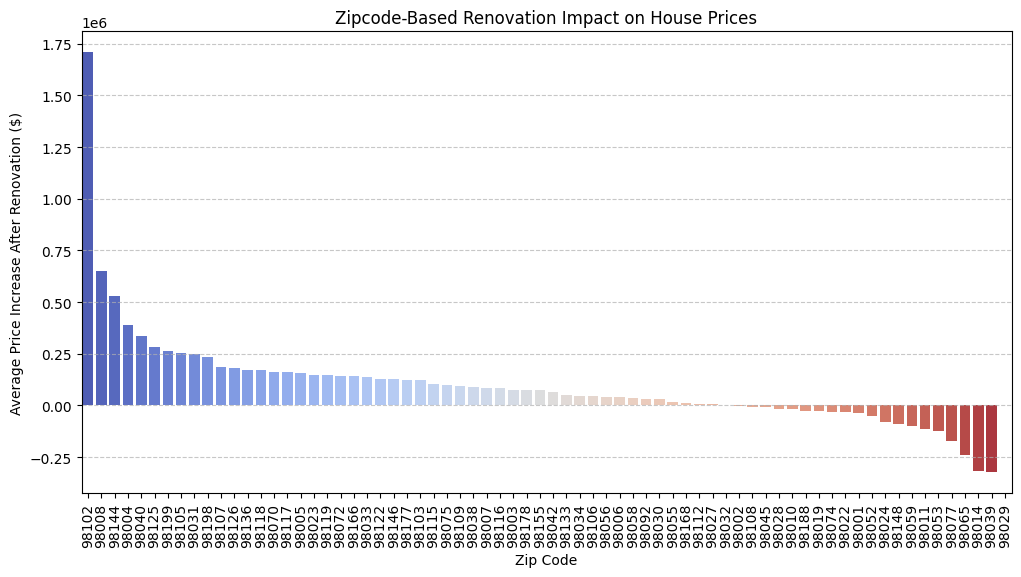

renovated,False,True,price_difference
zipcode,,,
98102,833891.980,2542500.000,1708608.020
98008,629517.348,1280857.143,651339.795
98144,559186.078,1088904.304,529718.226
98004,1322726.059,1711535.714,388809.655
98040,1160232.870,1497084.483,336851.613


In [19]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Replace NaN values in 'yr_renovated' with 0
df['yr_renovated'].fillna(0, inplace=True)

# Create a new column to indicate whether a house is renovated or not
df['renovated'] = df['yr_renovated'] > 0

# Group by zipcode and renovation status and calculate mean prices
renovation_by_zipcode = df.groupby(["zipcode", "renovated"])['price'].mean().unstack()

# Calculate the price difference between renovated and non-renovated houses
renovation_by_zipcode["price_difference"] = renovation_by_zipcode[True] - renovation_by_zipcode[False]

# Sort zipcodes by the highest renovation price difference
renovation_by_zipcode_sorted = renovation_by_zipcode.sort_values(by="price_difference", ascending=False)

# Plot the results
plt.figure(figsize=(12,6))
sns.barplot(x=renovation_by_zipcode_sorted.index.astype(str), 
            y=renovation_by_zipcode_sorted["price_difference"], 
            palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Zip Code")
plt.ylabel("Average Price Increase After Renovation ($)")
plt.title("Zipcode-Based Renovation Impact on House Prices")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display top 5 zip codes with highest renovation impact
renovation_by_zipcode_sorted.head(5)


In [20]:
min_price = df['price'].min()
max_price = df['price'].max()
avg_price = df['price'].mean()

min_year_built = df['yr_built'].min()
max_year_built = df['yr_built'].max()


print(f"Minimum House Price: ${min_price:,.0f}")
print(f"Maximum House Price: ${max_price:,.0f}")
print(f"Average House Price: ${avg_price:,.0f}\n")

print(f"Oldest House Built in : {min_year_built}")
print(f"Newest House Built in : {max_year_built}")

Minimum House Price: $78,000
Maximum House Price: $7,700,000
Average House Price: $540,254

Oldest House Built in : 1900
Newest House Built in : 2015


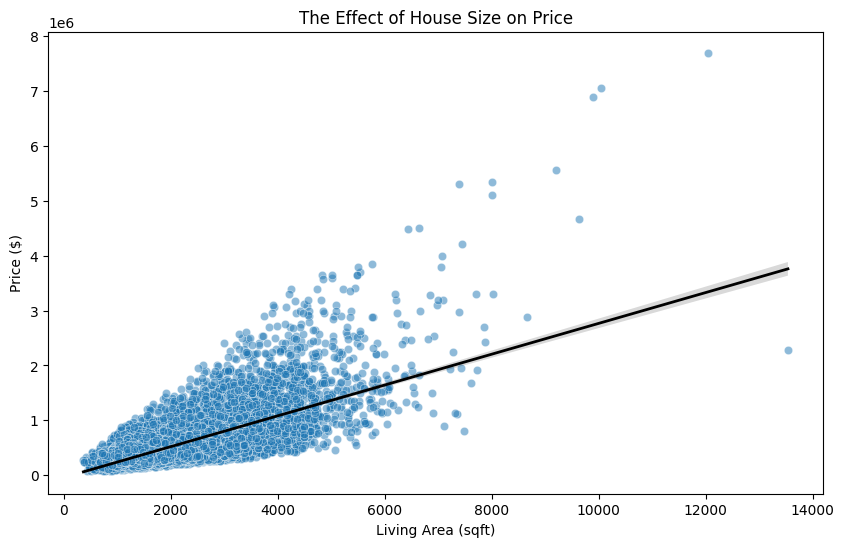

In [23]:
# 📌 Scatter Plot with Trend Line for House Size vs Price

plt.figure(figsize=(10,6))

# Scatter plot
sns.scatterplot(x=df["sqft_living"], y=df["price"], alpha=0.5)

# Add a regression line (trend line)
sns.regplot(x=df["sqft_living"], y=df["price"], scatter=False, color="black", line_kws={"linewidth": 2})

plt.xlabel("Living Area (sqft)")
plt.ylabel("Price ($)")
plt.title("The Effect of House Size on Price")

plt.show()

In [26]:
import folium
from IPython.display import display

# 📌 Load and filter the dataset
renovated_houses = df[df['yr_renovated'] > 0]

# Check if there are any renovated houses
if renovated_houses.empty:
    print("No renovated houses found in the dataset.")
else:
    # Define the map center based on the mean latitude and longitude of renovated houses
    map_center = [renovated_houses['lat'].mean(), renovated_houses['long'].mean()]
    house_map = folium.Map(location=map_center, zoom_start=11, tiles="cartodb positron")

    # Add CircleMarkers (scatter points) for renovated houses
    for idx, row in renovated_houses.iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,  # Slightly larger point size
            color="red",
            fill=True,
            fill_color="blue",
            fill_opacity=0.9,
        ).add_to(house_map)

    # Display the map in Jupyter Notebook
    display(house_map)

    # Save map as an HTML file
    house_map.save("renovated_houses_map.html")


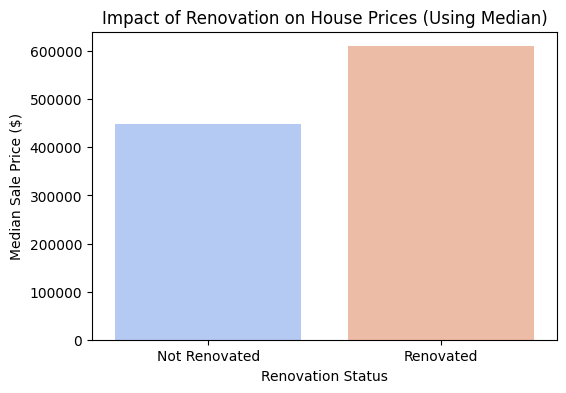

renovated
False   449000.000
True    610000.000
Name: price, dtype: float64

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'date' to datetime format if exists
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# Ensure 'yr_renovated' is numeric and fill NaN values with 0
df['yr_renovated'].fillna(0, inplace=True)

# Create a renovation flag (True if renovated, False otherwise)
df['renovated'] = df['yr_renovated'] > 0

# 📌 Compute median price instead of mean
renovated_prices_median = df.groupby('renovated')['price'].median()

# 📊 Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=renovated_prices_median.index, y=renovated_prices_median.values, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Not Renovated", "Renovated"])
plt.xlabel("Renovation Status")
plt.ylabel("Median Sale Price ($)")
plt.title("Impact of Renovation on House Prices (Using Median)")

plt.show()

# Display median prices
renovated_prices_median

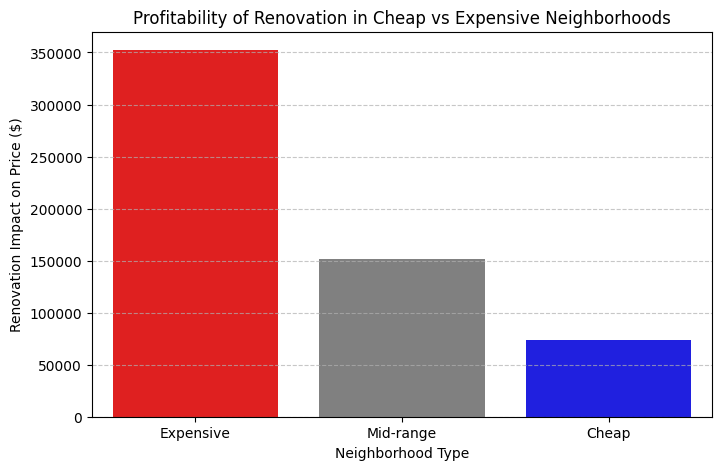

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sıralama işlemi
renovation_impact_sorted = renovation_impact.sort_values(by="price_difference", ascending=False)

# Görselleştirme
plt.figure(figsize=(8, 5))
sns.barplot(
    x=renovation_impact_sorted.index, 
    y=renovation_impact_sorted["price_difference"], 
    palette={"Cheap": "blue", "Mid-range": "gray", "Expensive": "red"}
)
plt.xlabel("Neighborhood Type")
plt.ylabel("Renovation Impact on Price ($)")
plt.title("Profitability of Renovation in Cheap vs Expensive Neighborhoods")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


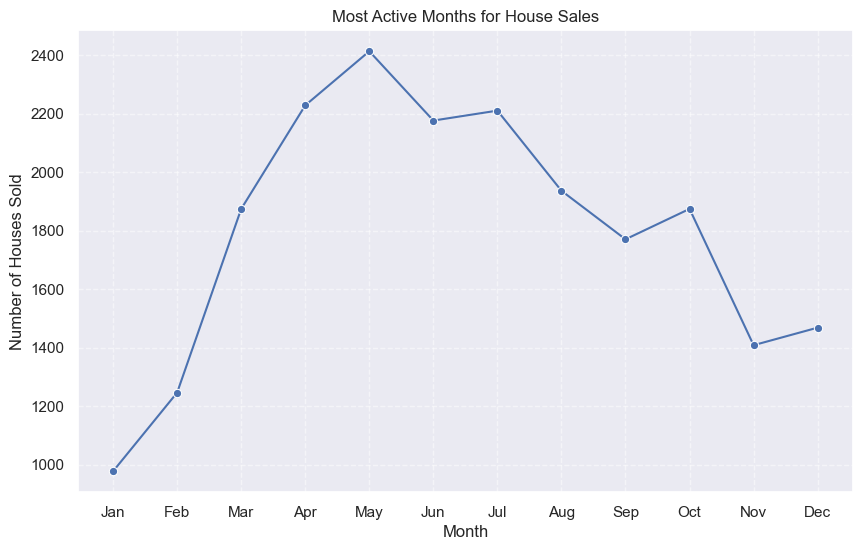

In [30]:
# 📌 Satış Sayılarını Tekrar Hesaplayalım ve Grafiği Düzelterek Çizelim

# 'date' sütununu datetime formatına çevirelim
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Satış aylarını belirleyelim
df['month'] = df['date'].dt.month

# Her ayın toplam satış sayısını hesaplayalım
monthly_sales_count = df.groupby('month').size()

# 📊 Line Chart: En Çok Satış Yapılan Aylar

sns.set_theme(style="darkgrid")  # Seaborn teması

plt.figure(figsize=(10, 6))

# Line plot çizelim (Aylık satış sayıları)
sns.lineplot(x=monthly_sales_count.index, y=monthly_sales_count.values, marker="o", color="b")

plt.xlabel("Month")
plt.ylabel("Number of Houses Sold")
plt.title("Most Active Months for House Sales")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()